## Convolutional Neural Network (CNN or ConvNets)



## Content


#### *   Description
#### 1. Importing Libraries and data 
#### 2. Size of training and testing data
#### 3. Data Visualization 
#### 4. Prepare the data
#### 5. Split the train data into train and test dataset. 
#### 6. Reshape the dataset into 4D array
#### 7. Creating CNN with the following architecture
#### 8. Compile the model
#### 9. Train the model
#### 10. Evaluate the model
#### 11. Make a prediction from the test data
#### 12. Visualize again
#### 13. Confusion matrix
#### 14. Display a Classification report
#### 15. Improving Model





### Description:
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed $x$ as $x = i \cdot 28 + j$, where $i$ and $j$ are integers between $0$ and $27$. The pixel is located on row $i$ and column $j$ of a $28 \times 28$ matrix.

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

#### Labels

Each training and test example is assigned to one of the following labels: 

0. T-shirt/top,  
1. Trouser,  
2. Pullover,  
3. Dress,  
4. Coat,  
5. Sandal,  
6. Shirt,  
7. Sneaker,  
8. Bag,  
9. Ankle boot 

### 1) Importing Libraries and Data

In [0]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# avoid printing Tf warnings
import logging

logging.disable(logging.WARNING)

lab_dict = ['tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import the data from the location on your computer
path = '/content/drive/My Drive/Datasets/fashionmnist/'
training_data = pd.read_csv(path + "fashion-mnist_train.csv")
testing_data = pd.read_csv(path + "fashion-mnist_test.csv")

### 2) Size of training and testing data


In [0]:
print("training data size", ":", training_data.shape,'\n', "testing data size", ":", testing_data.shape)

training data size : (60000, 785) 
 testing data size : (10000, 785)


In [0]:
# Converge to arrays
training_data = np.array(training_data)
testing_data = np.array(testing_data)

In [0]:
## y_train = [0,1,2,2,2,1,9,5,..]
## CNN for image 1 => [0.1,0.02...,0.9,0..] = distribution on 10 classes
## y=2 => [0,0,1,0,0,0,0,0,0,0,0]
## y=4 => [0,0,0,0,1,0,0,0,0,0,0]

### 3) Data visualization
Plot images with their labels (numbers) as titles

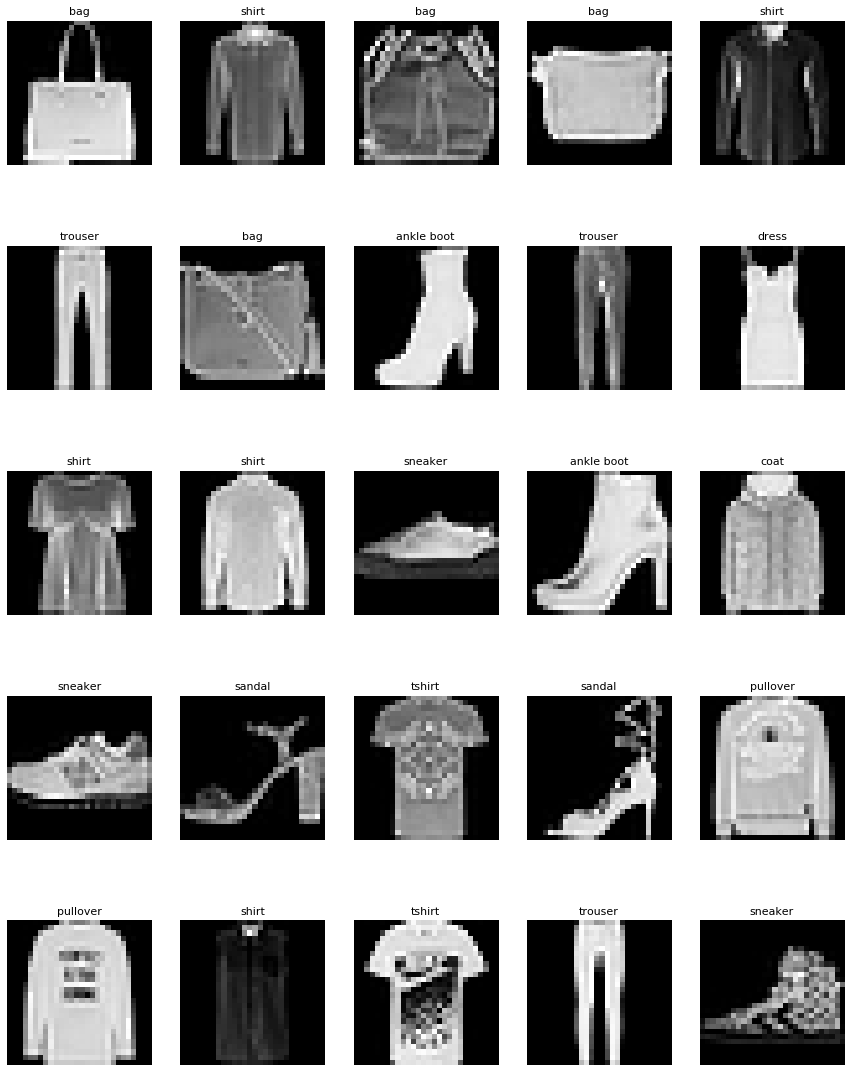

In [0]:
# Dimensions of the plot grid 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

number_training = len(training_data) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, number_training)
    # read and display an image with the selected index    
    axes[i].imshow( training_data[index,1:].reshape((28,28)), cmap='gray')
    axes[i].set_title(lab_dict[training_data[index,0]], fontsize = 11)
    axes[i].axis('off')

### 4) Prepare the data
Creating input and output data, scaling it so that the pixel values are between 0 and 1 - neural networks usually work better with normalized data

In [0]:
input_train = training_data[:,1:]/255
output_train = training_data[:,0]

input_test = testing_data[:,1:]/255
output_test= testing_data[:,0]

print(input_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01568627 0.
 0.         0.         0.         0.         0.24313725 0.23921569
 0.08235294 0.11372549 0.09019608 0.2        0.5

### 5) Split the train data into train and test dataset.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

X_train, X_val, y_train, y_val = train_test_split(input_train, output_train, test_size = 0.2, random_state = 0)
X_test=input_test
y_test=output_test




print(y_train.shape)

(48000,)


In [0]:
X_test.shape

(10000, 784)

### 6) Reshape the dataset into 4D array
2D Convolution layer of keras use input of the form: (Batch_size, image_dim_1, image_dim_2, channel_dim). Batch_size here is the number of examples. channel_dim is the number of color channels. Reshape the data into 4D array.

In [0]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_val=X_val.reshape(X_val.shape[0],28,28,1)
print(X_train.shape)
print(X_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


### 7) Creating CNN with the following architecture:
    - 1 Input layer
    - 1 Convolution Layer with 
        - 32 filters and a kernel size of 5 
        - ReLU activations
    - Max Pooling with a kernel 2x2 and stride 2
    - 1 Convolution Layer with 64 filters and a kernel size of 3
        - 64 filters and a kernel size of 3 
        - ReLU activation
    - Max Pooling with a kernel 2x2 and stride 2
    - A flatten layer
    - 1 Fully connected layer with 32 neurons
    - 1 Output layer

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [0]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(32,5, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

#cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
#cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
#cnn_model.add(Dense(output_dim = 10, activation = 'softmax'))
cnn_model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [0]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

 ### 8) Compile the model. 
 

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer="adam",metrics =['accuracy'])

 ### 9) Train the model.
 We may also use the validate data to see how it works 

In [0]:
y_train.shape

(48000,)

In [0]:
epochs = 5

history = cnn_model.fit(X_train, y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1, validation_data=(X_val,y_val))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 71us/step - loss: 0.9739 - acc: 0.6591 - val_loss: 0.5865 - val_acc: 0.7767
Epoch 2/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.5383 - acc: 0.7993 - val_loss: 0.4825 - val_acc: 0.8276
Epoch 3/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.4646 - acc: 0.8322 - val_loss: 0.4334 - val_acc: 0.8443
Epoch 4/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.4219 - acc: 0.8501 - val_loss: 0.4087 - val_acc: 0.8535
Epoch 5/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.4015 - acc: 0.8551 - val_loss: 0.3995 - val_acc: 0.8608


### 10) Evaluate the model
Using test data for this part.

In [0]:
input_test = input_test.reshape(input_test.shape[0], 28,28,1)
evaluation = cnn_model.evaluate(input_test, output_test)
print(f'Test Accuracy : {evaluation[1]}')

10000/10000 [==============================] - 1s 73us/step
Test Accuracy : 0.8579


### 11) Make a prediction from the test data

In [0]:
predicted_classes = cnn_model.predict_classes(input_test)

### 12) Visualize again
Plotting some test images with their classes and predicted classes

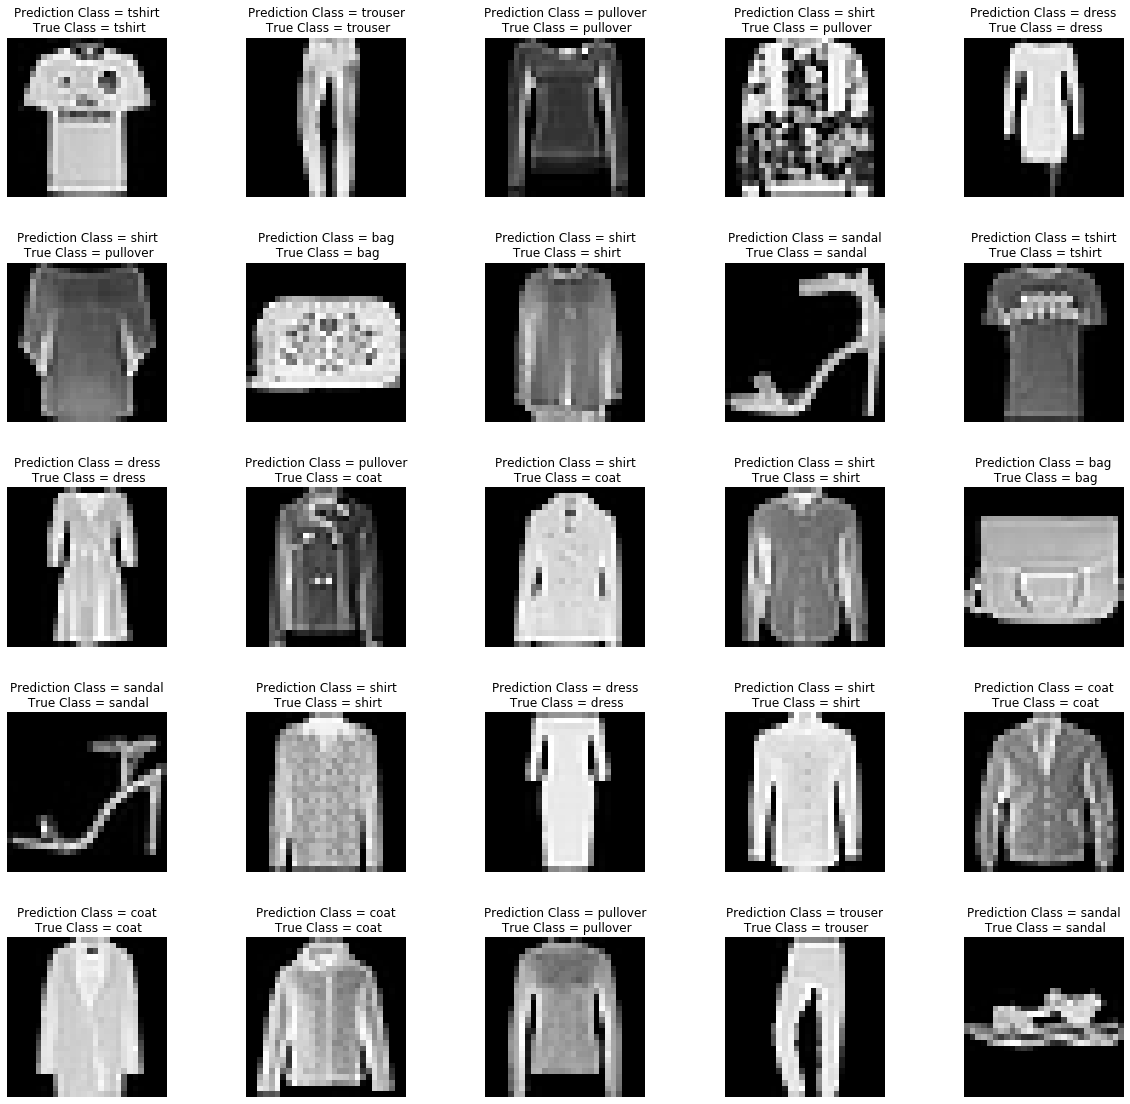

In [0]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(input_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"Prediction Class = {lab_dict[predicted_classes[i]]}\n True Class = {lab_dict[output_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


### 13) Confusion matrix

[0 1 2 ... 8 8 1]


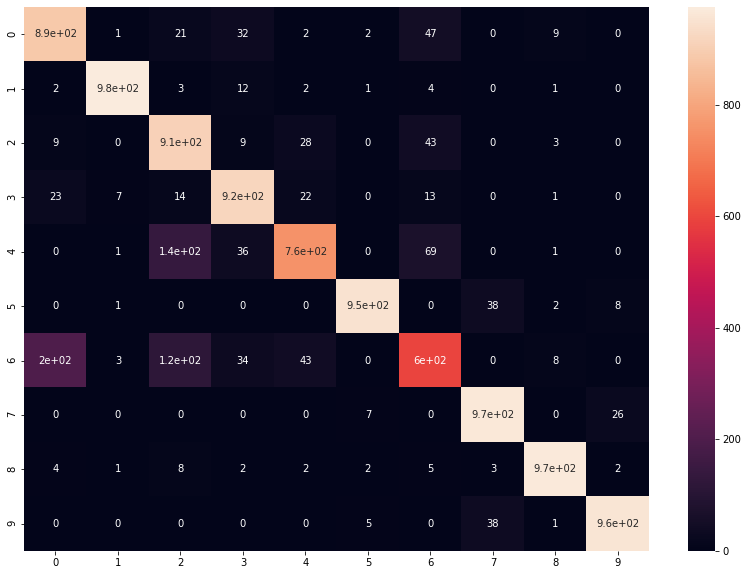

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(output_test, predicted_classes)
print(output_test)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### 14) Display a classification report

In [0]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(output_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.89      0.83      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.75      0.91      0.82      1000
     Class 3       0.88      0.92      0.90      1000
     Class 4       0.88      0.76      0.81      1000
     Class 5       0.98      0.95      0.97      1000
     Class 6       0.77      0.60      0.67      1000
     Class 7       0.92      0.97      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### 15) Improving model.
Using one-hot encoding for our labels and using `categorical_crossentropy` instead of `sparse_categorical_crossentropy` loss now.
Trying different architectures.

In [0]:
y_train_OHE = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_OHE = ohe.transform(y_test.reshape(-1,1)).toarray()
y_val_OHE = ohe.transform(y_val.reshape(-1,1)).toarray()

In [0]:
# 6) Train the model: make the architecture of the model
np.random.seed(1)
model=Sequential()
model.add(Conv2D(64, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)             

In [0]:
opt = Adam(lr=0.001)
metrics = 'accuracy'

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
history=model.fit(X_train, y_train_OHE, batch_size=512, epochs=15, validation_data=(X_val,y_val_OHE))


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 69us/step - loss: 0.2364 - acc: 0.9143 - val_loss: 0.2386 - val_acc: 0.9136
Epoch 2/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.2267 - acc: 0.9182 - val_loss: 0.2285 - val_acc: 0.9192
Epoch 3/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.2254 - acc: 0.9183 - val_loss: 0.2369 - val_acc: 0.9155
Epoch 4/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.2165 - acc: 0.9216 - val_loss: 0.2356 - val_acc: 0.9143
Epoch 5/15
48000/48000 [==============================] - 3s 69us/step - loss: 0.2160 - acc: 0.9224 - val_loss: 0.2339 - val_acc: 0.9144
Epoch 6/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.2038 - acc: 0.9249 - val_loss: 0.2222 - val_acc: 0.9187
Epoch 7/15
48000/48000 [==============================] - 3s 68us/step - loss: 0.2001 - acc: 0.9269 - val_loss: 0.2184 - val_acc

In [0]:
model.evaluate(X_test,y_test_OHE)

10000/10000 [==============================] - 1s 73us/step


[0.21844924810230731, 0.9216]